In [5]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
font = {'family' : 'normal',
        'size'   : 22}
mpl.rc('font', **font)

In [2]:
df = pd.read_csv("./bases/suicide/master.csv") 
filtro = df.year > 1999
filtro2 = df.year < 2016
df = df[filtro & filtro2]
df = df.groupby(['country','year','age'], as_index=False)['suicides_no','population'].sum()
df = df.set_index(['country','year','age'])
df = df.reindex( pd.MultiIndex.from_product([df.index.levels[0],df.index.levels[1],df.index.levels[2]], names=['country', 'year','age']),fill_value=np.nan).reset_index()
func = lambda x:x.suicides_no.isna()
series = df[func].reset_index().groupby(['country'])['year'].count()
lista = list(series[series > 30].index)
filtro3 = df.country.isin(lista)
df = df[~filtro3]
def limpa_idade(age):
    return age[:-6]
df['age'] = df['age'].apply(limpa_idade)

,country,year,age,suicides_no,population
0,Albania,2000,15-24,11.0,503900.0
1,Albania,2000,25-34,20.0,477800.0
2,Albania,2000,35-54,9.0,706900.0
3,Albania,2000,5-14,1.0,699600.0
4,Albania,2000,55-74,10.0,345400.0
5,Albania,2000,75+,3.0,62700.0
6,Albania,2001,15-24,19.0,527398.0
7,Albania,2001,25-34,26.0,429255.0
8,Albania,2001,35-54,46.0,749017.0
9,Albania,2001,5-14,8.0,628912.0


In [3]:
def preenche_nan(df):
    rdfs= pd.melt(df.pivot_table('suicides_no', ['country'], 'year')
    .interpolate(method='linear',limit_direction='both', axis=1).reset_index(),
    id_vars=["country"], var_name="year", value_name="suicides")
    rdfp = pd.melt(df.pivot_table('population', ['country'], 'year')
    .interpolate(method='linear',limit_direction='both', axis=1).reset_index(),
    id_vars=["country"], var_name="year", value_name="population")
    result = rdfs.merge(rdfp).sort_values(['country','year']).reset_index(drop=True)
    result['suicide100'] = (result['suicides'] * 100000 ) / result['population']
    return result
df1 = preenche_nan(df[df.age == '5-14'])
df2 = preenche_nan(df[df.age == '15-24'])
df3 = preenche_nan(df[df.age == '25-34'])
df4 = preenche_nan(df[df.age == '35-54'])
df5 = preenche_nan(df[df.age == '55-74'])
df6 = preenche_nan(df[df.age == '75+'])
df1w = df1.groupby('year').agg(np.sum).reset_index()
df1w['suicide100'] = (df1w['suicides'] * 100000 ) / df1w['population']
df2w = df2.groupby('year').agg(np.sum).reset_index()
df2w['suicide100'] = (df2w['suicides'] * 100000 ) / df2w['population']
df3w = df3.groupby('year').agg(np.sum).reset_index()
df3w['suicide100'] = (df3w['suicides'] * 100000 ) / df3w['population']
df4w = df4.groupby('year').agg(np.sum).reset_index()
df4w['suicide100'] = (df4w['suicides'] * 100000 ) / df4w['population']
df5w = df5.groupby('year').agg(np.sum).reset_index()
df5w['suicide100'] = (df5w['suicides'] * 100000 ) / df5w['population']
df6w = df6.groupby('year').agg(np.sum).reset_index()
df6w['suicide100'] = (df6w['suicides'] * 100000 ) / df6w['population']


In [11]:
df1w

,year,suicides,population,suicide100
0,2000,1986.00,2.825169e+08,0.702967
1,2001,2038.50,2.795805e+08,0.729128
2,2002,1974.00,2.765013e+08,0.713921
3,2003,1801.00,2.741666e+08,0.656900
4,2004,1847.00,2.714256e+08,0.680481
5,2005,1794.00,2.685192e+08,0.668109
6,2006,1723.75,2.662076e+08,0.647521
7,2007,1679.50,2.639761e+08,0.636232
8,2008,1644.25,2.633887e+08,0.624267
9,2009,1752.00,2.618518e+08,0.669081


Text(0, 0.5, 'suicidio por 100.000')

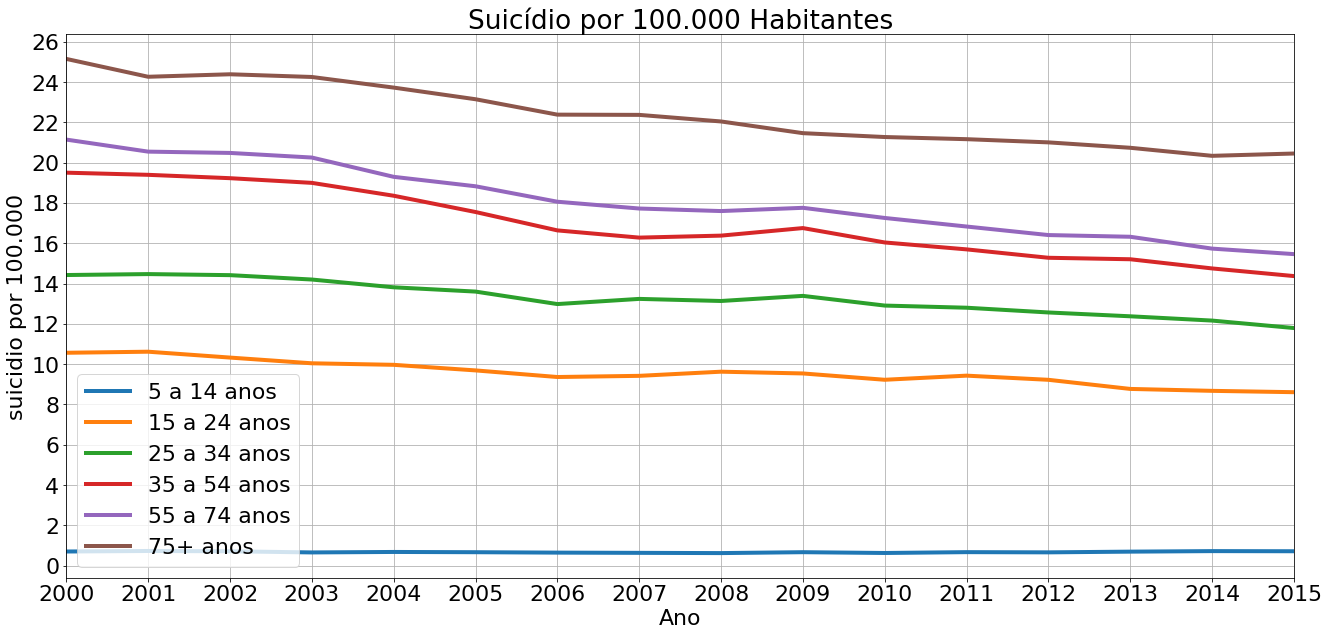

In [14]:
fig, ax = plt.subplots(figsize=(22, 10))
ax.set_title("Suicídio por 100.000 Habitantes")
df1w.plot(x='year', y='suicide100',linewidth=4, ax=ax, grid=True,yticks=range(26,-2,-2),label='5 a 14 anos')
df2w.plot(x='year', y='suicide100',linewidth=4, ax=ax, grid=True,xticks=range(2000,2016), label='15 a 24 anos')
df3w.plot(x='year', y='suicide100',linewidth=4, ax=ax, grid=True,label='25 a 34 anos')
df4w.plot(x='year', y='suicide100',linewidth=4, ax=ax, grid=True, label='35 a 54 anos')
df5w.plot(x='year', y='suicide100',linewidth=4, ax=ax, grid=True,label='55 a 74 anos')
df6w.plot(x='year', y='suicide100',linewidth=4, ax=ax, grid=True, label='75+ anos')
ax.set_xlabel("Ano")
ax.set_ylabel("suicidio por 100.000")